In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as  dt
plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('sales_data_sample.csv',encoding='unicode_escape')

In [3]:
df.shape

(2823, 25)

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [6]:
to_drop = ['PHONE','ADDRESSLINE1','ADDRESSLINE2','STATE','POSTALCODE']
df=df.drop(to_drop,axis=1)

In [7]:
df.shape

(2823, 20)

In [8]:
df.isnull().sum()
#Not dealing with the mising values of 'Territory' Variable as it may not have a significant effect on the analysis.


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
CITY                   0
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

Checking for inconsistent data types

In [9]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
CITY                 object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

Changing the data type of variable 'ORDERDATE' from object to datetime

In [10]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

Summary stats of Quantitative variables

In [11]:
quant_vars = ['QUANTITYORDERED','PRICEEACH','SALES','MSRP']
df[quant_vars].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
QUANTITYORDERED,2823.0,35.092809,9.741443,6.00,27.00,35.0,43.0,97.0
PRICEEACH,2823.0,83.658544,20.174277,26.88,68.86,95.7,100.0,100.0
SALES,2823.0,3553.889072,1841.865106,482.13,2203.43,3184.8,4508.0,14082.8
MSRP,2823.0,100.715551,40.187912,33.00,68.00,99.0,124.0,214.0


# Exploring the variables

Order Quantity Distribution

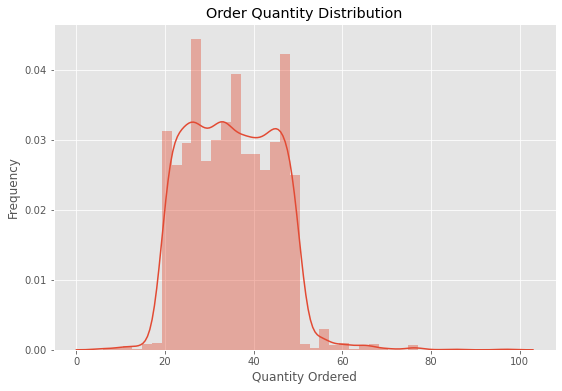

In [12]:
plt.figure(figsize=(9,6))
sns.distplot(df['QUANTITYORDERED'])
plt.title('Order Quantity Distribution')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()

From the distribution plot of quantity, we can infer that the orders are bulk orders. Majority of the order's quantity are between 20 -40 units.



Price Distribution


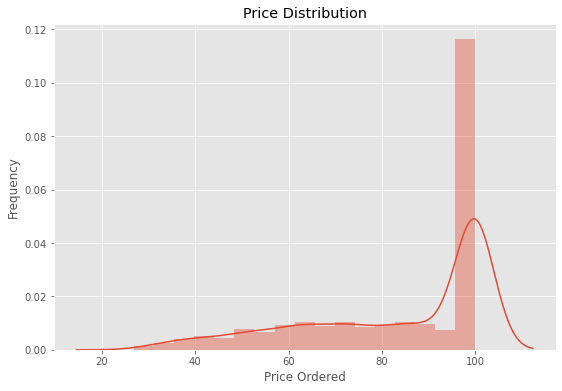

In [13]:
plt.figure(figsize=(9,6))
sns.distplot(df['PRICEEACH'])
plt.title('Price Distribution')
plt.xlabel('Price Ordered')
plt.ylabel('Frequency')
plt.show()



The distribution of Price is Left Skewed with max price of 100$. Interestingly, many of the orders recieved are of this price. Not investigating further about this particular product line which has the highest price beacuse the target is to segment the customers.

Sales Distribution

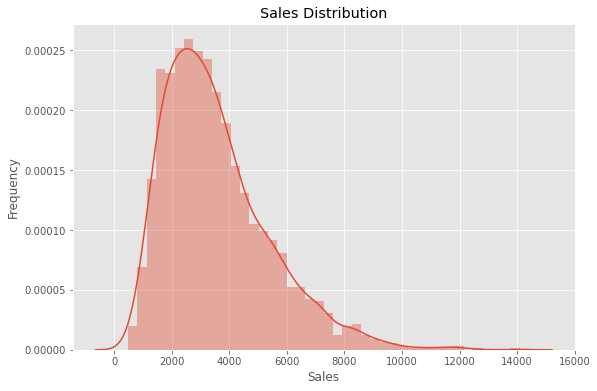

In [14]:
plt.figure(figsize=(9,6))
sns.distplot(df['SALES'])
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

Analyzing the STATUS variable

In [15]:
df['STATUS'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [16]:
df['STATUS'].value_counts(normalize = True)

Shipped       0.927028
Cancelled     0.021254
Resolved      0.016649
On Hold       0.015586
In Process    0.014524
Disputed      0.004959
Name: STATUS, dtype: float64

In [17]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY', 'COUNTRY',
       'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [18]:
df.groupby(['ORDERNUMBER',])['SALES'].sum()

ORDERNUMBER
10100    12133.25
10101    11432.34
10102     6864.05
10103    54702.00
10104    44621.96
           ...   
10421     7261.75
10422     6166.80
10423     8411.95
10424    35133.34
10425    43784.69
Name: SALES, Length: 307, dtype: float64

Checking the time range of the data

In [20]:
df.groupby(['YEAR_ID'])['MONTH_ID'].unique()

YEAR_ID
2003    [2, 5, 7, 8, 10, 11, 12, 1, 3, 9, 4, 6]
2004    [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 3]
2005                            [2, 3, 4, 5, 1]
Name: MONTH_ID, dtype: object

In [21]:
df.groupby(['YEAR_ID'])['MONTH_ID'].nunique()

YEAR_ID
2003    12
2004    12
2005     5
Name: MONTH_ID, dtype: int64

Dealsize Distribution

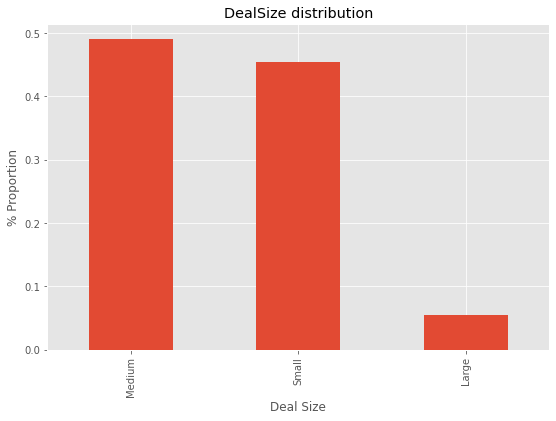

In [22]:
plt.figure(figsize=(9,6))
df['DEALSIZE'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('DealSize distribution')
plt.xlabel('Deal Size')
plt.ylabel('% Proportion')
plt.show()

In [25]:
df['DEALSIZE'].value_counts()

Medium    1384
Small     1282
Large      157
Name: DEALSIZE, dtype: int64

# Analyzing KPIs


Annual Revenue

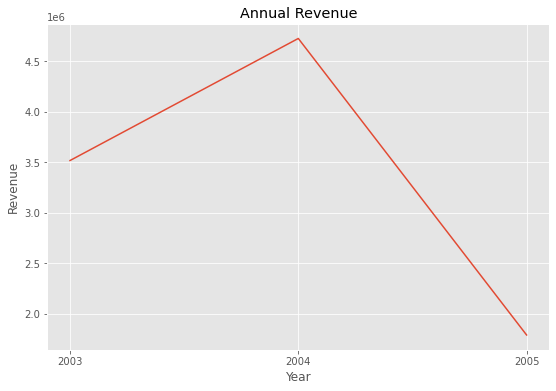

In [26]:
#Annual Revenue
plt.figure(figsize=(9,6))
df.groupby(['YEAR_ID'])['SALES'].sum().plot()
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Annual Revenue')
plt.xticks(np.arange(2003,2006,1))
plt.show()

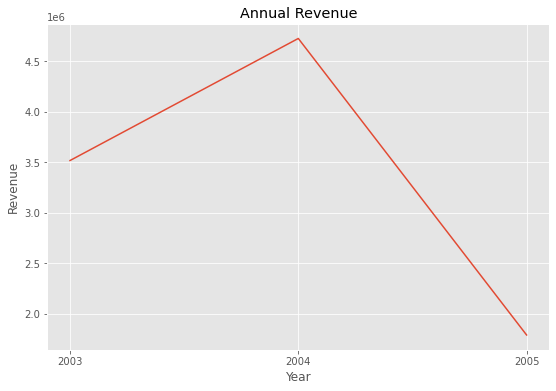

In [29]:
#Annual Revenue
plt.figure(figsize=(9,6))
df.groupby(['YEAR_ID'])['SALES'].sum().plot()
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Annual Revenue')
plt.xticks(np.arange(2003,2006,1))
plt.show()



As we dont have the complete data for 2005, analyzing the Annual Revenue can be misleading. Instead, we can analyze Monthy Revenue.


Monthly Revenue

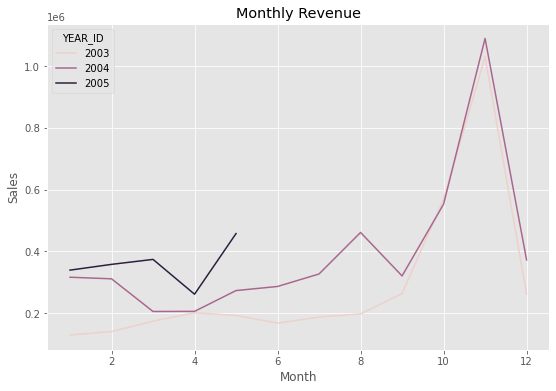

In [30]:
#Monthly Revenue
plt.figure(figsize=(9,6))

monthly_revenue = df.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()
monthly_revenue
sns.lineplot(x="MONTH_ID", y="SALES",hue="YEAR_ID", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Revenue')
plt.show()



This clearly shows that the revenue is growing especially in October and November. It can be the result of the seasonality(Thnaks Giving and other festivitues). We can also observe that 2005 is performing better than the other years in terms of revenue having the maximum sales in all the months(Jan - May). The reason behind this spike of sales in 2005 can be further investigated to maintain high sales in future.

Monthly Revenue Growth Rate:

In [31]:
monthly_revenue['MONTHLY GROWTH'] = monthly_revenue['SALES'].pct_change()

In [32]:
monthly_revenue.head()

,YEAR_ID,MONTH_ID,SALES,MONTHLY GROWTH
0,2003,1,129753.60,NaN
1,2003,2,140836.19,0.085413
2,2003,3,174504.90,0.239063
3,2003,4,201609.55,0.155323
4,2003,5,192673.11,-0.044325


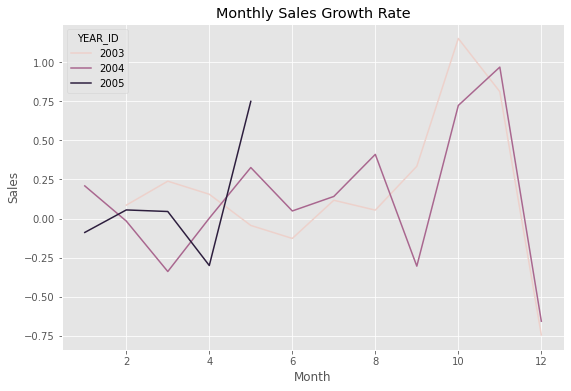

In [33]:
#Monthly Sales Growth Rate
plt.figure(figsize=(9,6))
sns.lineplot(x="MONTH_ID", y="MONTHLY GROWTH",hue="YEAR_ID", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Growth Rate')
plt.show()

Apart from expected high/low growth rates during the seasonal months, there is high growth rate from Apr 2005 to May 2005.

Top 10 countries by Sales

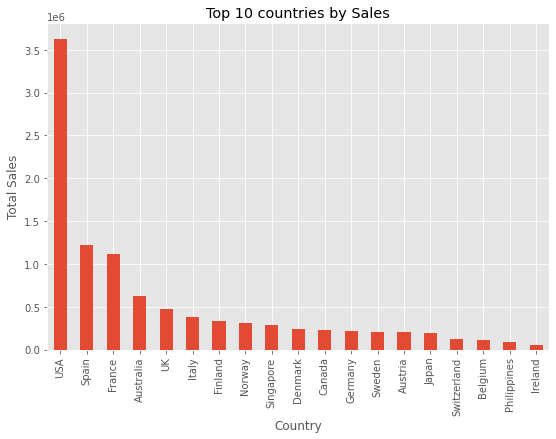

In [34]:
plt.figure(figsize=(9,6))
top_cities = df.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=False)
top_cities.plot(kind = 'bar')
plt.title('Top 10 countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

Monthly Active Customers

In [40]:
monthly_active = df.groupby(['YEAR_ID','MONTH_ID'])['CUSTOMERNAME'].value_counts()
monthly_active

YEAR_ID  MONTH_ID  CUSTOMERNAME                
2003     1         Baane Mini Imports              16
                   Euro Shopping Channel           13
                   Blauer See Auto, Co.             4
                   Online Diecast Creations Co.     4
                   Vitachrome Inc.                  2
                                                   ..
2005     5         Gift Depot Inc.                  6
                   Australian Collectables, Ltd     5
                   Petit Auto                       5
                   Diecast Classics Inc.            2
                   Mini Gifts Distributors Ltd.     2
Name: CUSTOMERNAME, Length: 286, dtype: int64

In [42]:
monthly_active = df.groupby(['YEAR_ID','MONTH_ID'])['CUSTOMERNAME'].nunique()
monthly_active

YEAR_ID  MONTH_ID
2003     1            5
         2            3
         3            6
         4            7
         5            6
         6            5
         7            6
         8            5
         9            8
         10          16
         11          27
         12           6
2004     1            8
         2            9
         3            7
         4           10
         5            8
         6           10
         7           10
         8           12
         9           12
         10          13
         11          30
         12           9
2005     1           11
         2            7
         3           10
         4            8
         5           12
Name: CUSTOMERNAME, dtype: int64

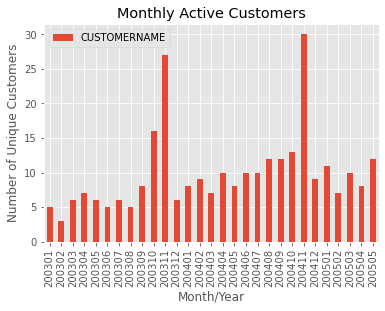

In [43]:
#plt.figure(figsize=(10,8))
df['YEAR_MONTH'] = df['YEAR_ID'].map(str)+df['MONTH_ID'].map(str).map(lambda x: x.rjust(2,'0'))
monthly_active = df.groupby(['YEAR_MONTH'])['CUSTOMERNAME'].nunique().reset_index()
monthly_active.plot(kind='bar',x='YEAR_MONTH',y='CUSTOMERNAME')
#plt.figure(figsize=(10,8))
plt.title('Monthly Active Customers')
plt.xlabel('Month/Year')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=90)
#plt.figure(figsize=(10,8))
plt.show()

In [45]:
df = pd.read_csv('sales_data_sample.csv', encoding = 'unicode_escape', parse_dates=['ORDERDATE'])
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [46]:
df.isna().mean()

ORDERNUMBER         0.000000
QUANTITYORDERED     0.000000
PRICEEACH           0.000000
ORDERLINENUMBER     0.000000
SALES               0.000000
ORDERDATE           0.000000
STATUS              0.000000
QTR_ID              0.000000
MONTH_ID            0.000000
YEAR_ID             0.000000
PRODUCTLINE         0.000000
MSRP                0.000000
PRODUCTCODE         0.000000
CUSTOMERNAME        0.000000
PHONE               0.000000
ADDRESSLINE1        0.000000
ADDRESSLINE2        0.893022
CITY                0.000000
STATE               0.526390
POSTALCODE          0.026922
COUNTRY             0.000000
TERRITORY           0.380446
CONTACTLASTNAME     0.000000
CONTACTFIRSTNAME    0.000000
DEALSIZE            0.000000
dtype: float64

In [47]:
df_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
df = df.drop(df_drop, axis=1)
df.head(3)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium



Drop georaphic features and names, phone

In [48]:
df.shape

(2823, 14)

In [49]:
df.isna().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

Drop unbalanced feature

In [50]:
df.drop(columns=['STATUS'], axis=1, inplace=True)

Prepare data

In [51]:
def dummies(x):
  dummy = pd.get_dummies(df[x])
  df.drop(columns=x, inplace=True)
  return pd.concat([df, dummy], axis = 1)


In [52]:
df =  dummies('COUNTRY')

In [54]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,...,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,0
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,1
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,1


In [55]:
df =  dummies('PRODUCTLINE')

In [56]:
df =  dummies('DEALSIZE')

In [57]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0


In [58]:
y = pd.Categorical(df['PRODUCTCODE'])
y

['S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', ..., 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212']
Length: 2823
Categories (109, object): ['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', ..., 'S700_3962', 'S700_4002', 'S72_1253', 'S72_3212']

In [59]:
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes

In [60]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,0,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,0,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,0,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,0,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,0,...,0,1,0,0,0,0,0,0,1,0


In [62]:
df.drop('ORDERDATE', axis=1, inplace=True)

drop 'ORDERDATE', 'QTR_ID' because we have 'MONTH' etc.

In [63]:
df.drop('QTR_ID', axis=1, inplace=True)

In [64]:
df.shape

(2823, 37)

# Use K-MEANS algorithm

In [65]:
scaler =  StandardScaler()
df_scaled = scaler.fit_transform(df)

In [66]:
scores = []
range_values = range(1, 15)
for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  scores.append(kmeans.inertia_)

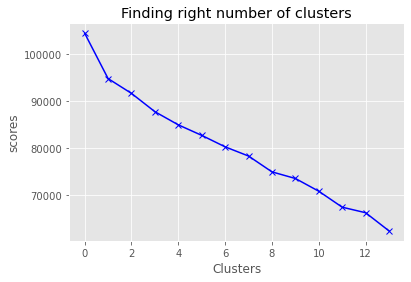

In [67]:
plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

The elbow method

In [68]:
kmeans = KMeans(4)
kmeans.fit(df_scaled)

KMeans(n_clusters=4)

In [69]:
labels = kmeans.labels_
labels

array([1, 1, 0, ..., 0, 1, 0])

In [70]:
kmeans.cluster_centers_.shape

(4, 37)

In [71]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns= [df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,0.440189,0.504615,-0.029566,0.370139,-0.038581,0.054380,0.040487,0.116779,0.018836,-0.070641,...,-0.521559,0.118912,0.089018,0.118456,0.004922,0.263356,0.162688,-0.237960,1.017516,-0.912100
1,-0.469799,-0.733554,0.041052,-0.814101,0.013444,-0.004058,-0.606932,0.301166,0.027727,-0.020087,...,-0.180340,0.008940,0.076123,0.065805,0.076749,-0.038733,0.098215,-0.242672,-0.980703,1.096370
2,0.289793,0.743157,-0.039021,1.107003,0.042424,-0.033678,1.184372,-0.795815,-0.073958,0.153629,...,1.141734,-0.217643,-0.301524,-0.300637,-0.157455,-0.303254,-0.428228,0.858853,0.469083,-0.866305
3,0.191867,-0.057456,-0.010199,0.033722,-0.277772,-0.945247,-0.068541,0.074165,-0.264819,-0.140961,...,0.331795,0.472398,0.269920,-0.300637,-0.167454,-0.345470,-0.429753,-0.074847,0.096424,-0.062363


Invert the data

In [72]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,39.380130,93.836976,6.341253,4235.514222,6.951404,2003.853132,102.342333,57.461123,7.019438e-02,9.719222e-03,...,0.095032,0.155508,0.136069,1.155508e-01,0.028078,1.879050e-01,0.281857,1.079914e-03,9.989201e-01,9.992007e-16
1,30.517104,68.862235,6.639618,2054.690207,7.141607,2003.812251,76.328560,63.284010,7.239459e-02,1.670644e-02,...,0.256961,0.120127,0.132060,1.010342e-01,0.039777,9.466985e-02,0.255370,-9.714451e-17,-8.326673e-16,1.000000e+00
2,37.915309,98.648550,6.301303,5592.477785,7.247557,2003.791531,148.304560,28.641694,4.723127e-02,4.071661e-02,...,0.884365,0.047231,0.014658,9.714451e-17,0.001629,1.302932e-02,0.039088,2.524430e-01,7.247557e-01,2.280130e-02
3,36.961538,82.499615,6.423077,3615.989615,6.076923,2003.153846,97.961538,56.115385,1.387779e-17,-3.469447e-18,...,0.500000,0.269231,0.192308,-1.387779e-17,0.000000,-1.387779e-17,0.038462,3.846154e-02,5.384615e-01,4.230769e-01


In [73]:
identified_clusters = kmeans.fit_predict(df_scaled)
identified_clusters

array([0, 0, 1, ..., 1, 0, 1])

In [76]:
identified_clusters

<function ndarray.nonzero>